<a href="https://colab.research.google.com/github/aravinddgit/Time-Series-Forecasting-ARIMA-LSTM-RNN/blob/main/CSE578_forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nsepy import get_history as gh
import datetime as dt
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
start_date = dt.datetime(2013,1,1)
end_date = dt.datetime(2020,12,31)
stk_data = gh(symbol='SBIN',start=start_date,end=end_date)

In [ ]:
stk_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-01-01,SBIN,EQ,2385.50,2404.90,2434.05,2397.55,2425.30,2426.45,2423.75,1720230,4.169403e+14,64215,662638,0.3852
2013-01-02,SBIN,EQ,2426.45,2450.00,2464.00,2438.15,2451.90,2450.55,2453.53,1466012,3.596900e+14,61823,508795,0.3471
2013-01-03,SBIN,EQ,2450.55,2460.00,2482.40,2436.20,2470.70,2471.60,2465.12,2010309,4.955653e+14,71411,820537,0.4082
2013-01-04,SBIN,EQ,2471.60,2460.00,2492.95,2450.65,2490.00,2486.70,2475.69,1370595,3.393164e+14,62637,231546,0.1689
2013-01-07,SBIN,EQ,2486.70,2490.00,2499.00,2461.75,2465.00,2467.60,2481.24,1026449,2.546866e+14,48683,269798,0.2628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,SBIN,EQ,263.00,265.00,268.85,264.65,266.85,266.85,267.02,28585509,7.632821e+14,167695,6820426,0.2386
2020-12-28,SBIN,EQ,266.85,268.75,276.00,268.00,275.75,275.20,272.23,36870242,1.003737e+15,203967,9995425,0.2711
2020-12-29,SBIN,EQ,275.20,276.30,279.90,274.70,277.75,277.90,277.56,45032526,1.249925e+15,237470,12390520,0.2751


In [ ]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [ ]:
train = data2[:len(data2)-150] 

In [ ]:
train

,Date,Open,High,Low,Close
Date,,,,,
2013-01-01,2013-01-01,2404.90,2434.05,2397.55,2426.45
2013-01-02,2013-01-02,2450.00,2464.00,2438.15,2450.55
2013-01-03,2013-01-03,2460.00,2482.40,2436.20,2471.60
2013-01-04,2013-01-04,2460.00,2492.95,2450.65,2486.70
2013-01-07,2013-01-07,2490.00,2499.00,2461.75,2467.60
...,...,...,...,...,...
2020-05-26,2020-05-26,152.40,153.20,150.20,151.40
2020-05-27,2020-05-27,151.95,160.80,150.80,158.60
2020-05-28,2020-05-28,159.45,162.40,156.70,158.20


In [ ]:
stepwise_fit = auto_arima(train['Close'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.13 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=24701.554, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=21067.620, Time=3.55 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=23090.415, Time=3.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=24708.722, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=21557.644, Time=0.49 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=20868.528, Time=14.53 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=16.33 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.01 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=24697.276, Time=2.02 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=20868.042, Time=18.66 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=21064.415, Time=5.88 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=17.14 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.63 sec
 ARIMA(3,0,0)(2,1,0)[12] interc

In [ ]:
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1830
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -10428.526
Date:                            Fri, 18 Nov 2022   AIC                          20867.052
Time:                                    04:40:25   BIC                          20894.579
Sample:                                         0   HQIC                         20877.208
                                           - 1830                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9892      0.039     25.524      0.000       0.913       1.065
ar.L2         -0.0368      0.038     -0.960      0.337      -0.112       0.038
ar.S.L12      -0.6545      0.002   -268.651      0.000      -0.659      -0.650
ar.S.L24      -0.3221      0.002   -136.914      0.000      -0.327      -0.317
sigma2      5574.2088     10.048    554.778      0.000    5554.516    5593.902
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          57281152.97
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                           -22.30
Prob(H) (two-sided):                  0.00   Kurtosis:                       871.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test = data2[len(data2)-150:]

In [ ]:
model = SARIMAX(train["Close"],  order = (2, 0, 0),  seasonal_order =(2, 1, 0, 12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
test

,Date,Open,High,Low,Close,Forecast
Date,,,,,,
2020-06-02,2020-06-02,169.90,171.30,167.20,170.25,172.571714
2020-06-03,2020-06-03,172.50,179.90,172.00,174.90,170.066743
2020-06-04,2020-06-04,174.90,177.65,171.50,174.05,174.850604
2020-06-05,2020-06-05,176.55,189.80,176.00,187.80,172.087073
2020-06-08,2020-06-08,197.00,197.50,185.80,186.80,183.751267
...,...,...,...,...,...,...
2020-12-24,2020-12-24,265.00,268.85,264.65,266.85,261.344641
2020-12-28,2020-12-28,268.75,276.00,268.00,275.20,266.907226
2020-12-29,2020-12-29,276.30,279.90,274.70,277.90,275.969988


In [ ]:
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1830
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -10428.526
Date:                            Fri, 18 Nov 2022   AIC                          20867.052
Time:                                    05:41:25   BIC                          20894.579
Sample:                                         0   HQIC                         20877.208
                                           - 1830                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9892      0.039     25.524      0.000       0.913       1.065
ar.L2         -0.0368      0.038     -0.960      0.337      -0.112       0.038
ar.S.L12      -0.6545      0.002   -268.651      0.000      -0.659      -0.650
ar.S.L24      -0.3221      0.002   -136.914      0.000      -0.327      -0.317
sigma2      5574.2088     10.048    554.778      0.000    5554.516    5593.902
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          57281152.97
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                           -22.30
Prob(H) (two-sided):                  0.00   Kurtosis:                       871.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.predict

<bound method Model.predict of <statsmodels.tsa.statespace.sarimax.SARIMAX object at 0x7f8f5783c050>>

In [ ]:
start_idx = len(train) 
end_idx = len(train) + len(test) - 1

In [ ]:
# predictions = result.predict(start_idx, end_idx, typ = 'levels').rename("Predictions") 
# predictions = result.predict(data2)

# predictions = stepwise_fit.predict(n_periods=150) 
predictions = result.predict(start =len(train), end=len(data2)-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
predictions

1830    172.567820
1831    172.362586
1832    172.249886
1833    170.400983
1834    166.603788
           ...    
1975    169.119692
1976    166.496752
1977    164.950610
1978    161.470720
1979    159.191748
Name: predicted_mean, Length: 150, dtype: float64

In [ ]:
test["Forecast"] = predictions.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,Date,Open,High,Low,Close,Forecast
Date,,,,,,
2020-06-02,2020-06-02,169.90,171.30,167.20,170.25,172.567820
2020-06-03,2020-06-03,172.50,179.90,172.00,174.90,172.362586
2020-06-04,2020-06-04,174.90,177.65,171.50,174.05,172.249886
2020-06-05,2020-06-05,176.55,189.80,176.00,187.80,170.400983
2020-06-08,2020-06-08,197.00,197.50,185.80,186.80,166.603788
...,...,...,...,...,...,...
2020-12-24,2020-12-24,265.00,268.85,264.65,266.85,169.119692
2020-12-28,2020-12-28,268.75,276.00,268.00,275.20,166.496752
2020-12-29,2020-12-29,276.30,279.90,274.70,277.90,164.950610


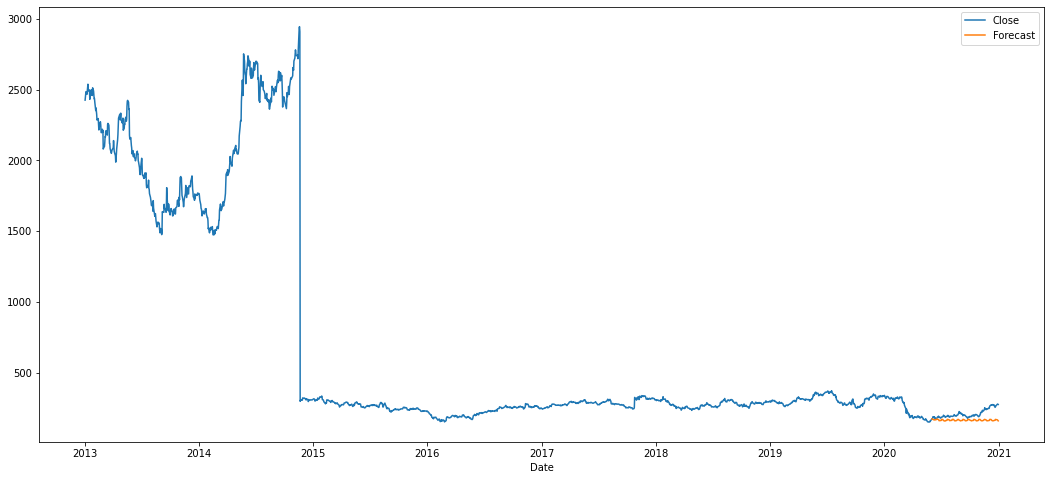

In [ ]:
data2['Close'].plot(legend = True, figsize=(18, 8))
test["Forecast"].plot(legend = True) 

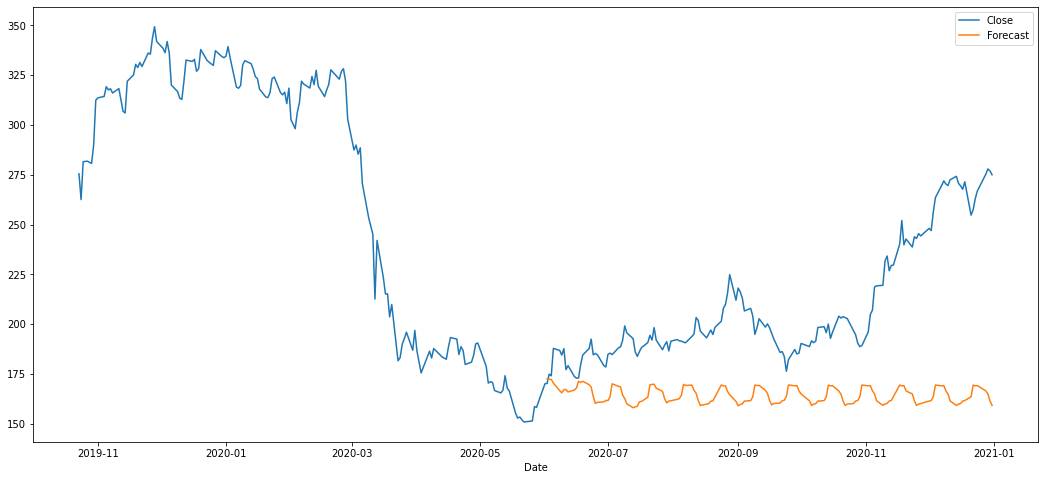

In [ ]:
data2['Close'][len(data2) - 300:].plot(legend = True, figsize=(18, 8))
test["Forecast"].plot(legend = True) 
# test[['Close', 'Forecast']].plot(figsize=(12, 8))

In [ ]:
predictions

1830    172.567820
1831    172.362586
1832    172.249886
1833    170.400983
1834    166.603788
           ...    
1975    169.119692
1976    166.496752
1977    164.950610
1978    161.470720
1979    159.191748
Name: Predictions, Length: 150, dtype: float64

In [ ]:
size = len(data2) - 150

In [ ]:
train_set = data2.iloc[0:size:, 4:5].values

In [ ]:
train_set

array([[2426.45],
       [2450.55],
       [2471.6 ],
       ...,
       [ 158.2 ],
       [ 161.3 ],
       [ 170.05]])

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []

In [ ]:
for i in range(60, size):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
56/56 [==============================] - 13s 96ms/step - loss: 0.0176
Epoch 2/25
56/56 [==============================] - 5s 87ms/step - loss: 0.0075
Epoch 3/25
56/56 [==============================] - 5s 87ms/step - loss: 0.0069
Epoch 4/25
56/56 [==============================] - 5s 86ms/step - loss: 0.0059
Epoch 5/25
56/56 [==============================] - 5s 87ms/step - loss: 0.0059
Epoch 6/25
56/56 [==============================] - 5s 87ms/step - loss: 0.0050
Epoch 7/25
56/56 [==============================] - 5s 88ms/step - loss: 0.0043
Epoch 8/25
56/56 [==============================] - 5s 87ms/step - loss: 0.0048
Epoch 9/25
56/56 [==============================] - 5s 88ms/step - loss: 0.0044
Epoch 10/25
56/56 [==============================] - 5s 89ms/step - loss: 0.0043
Epoch 11/25
56/56 [==============================] - 5s 87ms/step - loss: 0.0037
Epoch 12/25
56/56 [==============================] - 6s 100ms/step - loss: 0.0035
Epoch 13/25
56/56 [================

In [ ]:
new_start_date = end_date + dt.timedelta(days=-(60 + 150))
new_end_date = end_date

In [ ]:
new_start_date

datetime.datetime(2020, 6, 4, 0, 0)

In [ ]:
# input = gh(symbol='SBIN',start=new_start_date,end=new_end_date)

In [ ]:
# input['Date'] = input.index

In [ ]:
input = data2[len(data2)-150-60:]

In [ ]:
input

,Date,Open,High,Low,Close,forecast
Date,,,,,,
2020-02-28,2020-02-28,312.00,314.65,301.10,303.00,NaN
2020-03-02,2020-03-02,311.00,312.00,284.05,287.40,NaN
2020-03-03,2020-03-03,293.00,294.40,285.30,289.85,NaN
2020-03-04,2020-03-04,291.80,293.00,275.10,285.30,NaN
2020-03-05,2020-03-05,290.90,298.40,270.00,288.50,NaN
...,...,...,...,...,...,...
2020-12-24,2020-12-24,265.00,268.85,264.65,266.85,NaN
2020-12-28,2020-12-28,268.75,276.00,268.00,275.20,NaN
2020-12-29,2020-12-29,276.30,279.90,274.70,277.90,NaN


In [ ]:
input_df = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])

In [ ]:
input_df

,Date,Open,High,Low,Close


In [ ]:
input_df['Date'] = input['Date']
input_df['Open'] = input['Open']
input_df['High'] = input['High']
input_df['Low'] = input['Low']
input_df['Close'] = input['Close']

In [ ]:
input_df

,Date,Open,High,Low,Close
Date,,,,,
2020-02-28,2020-02-28,312.00,314.65,301.10,303.00
2020-03-02,2020-03-02,311.00,312.00,284.05,287.40
2020-03-03,2020-03-03,293.00,294.40,285.30,289.85
2020-03-04,2020-03-04,291.80,293.00,275.10,285.30
2020-03-05,2020-03-05,290.90,298.40,270.00,288.50
...,...,...,...,...,...
2020-12-24,2020-12-24,265.00,268.85,264.65,266.85
2020-12-28,2020-12-28,268.75,276.00,268.00,275.20
2020-12-29,2020-12-29,276.30,279.90,274.70,277.90


In [ ]:
real_stock_price = input_df.iloc[:, 4:5]

In [ ]:
real_stock_price = real_stock_price.values

In [ ]:
real_stock_price

In [ ]:
inputs = input_df.iloc[:,4:5].values

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
X_test = []

In [ ]:
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/5 [==============================] - 2s 23ms/step


In [ ]:
predicted_stock_price

array([[150.76796],
       [152.5396 ],
       [155.1019 ],
       [158.09846],
       [161.56668],
       [165.39133],
       [169.20863],
       [172.74434],
       [175.45285],
       [177.08536],
       [177.51942],
       [176.87408],
       [175.47302],
       [173.93419],
       [172.90077],
       [172.79385],
       [173.81065],
       [175.54262],
       [177.48215],
       [179.21484],
       [180.33528],
       [180.65874],
       [180.46114],
       [180.10828],
       [179.83139],
       [179.83527],
       [180.20137],
       [180.98557],
       [182.35725],
       [184.17897],
       [186.07664],
       [187.4997 ],
       [188.06425],
       [187.80093],
       [187.02617],
       [186.16908],
       [185.65256],
       [185.59166],
       [186.1173 ],
       [186.98781],
       [187.74501],
       [188.1616 ],
       [188.26521],
       [188.01988],
       [187.61717],
       [187.27911],
       [187.11221],
       [187.12276],
       [187.24715],
       [187.40334],


In [ ]:
output = data2[len(data2)-150:]

In [ ]:
output["forecast"] = predicted_stock_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
output

,Date,Open,High,Low,Close,forecast
Date,,,,,,
2020-06-02,2020-06-02,169.90,171.30,167.20,170.25,150.767960
2020-06-03,2020-06-03,172.50,179.90,172.00,174.90,152.539597
2020-06-04,2020-06-04,174.90,177.65,171.50,174.05,155.101898
2020-06-05,2020-06-05,176.55,189.80,176.00,187.80,158.098465
2020-06-08,2020-06-08,197.00,197.50,185.80,186.80,161.566681
...,...,...,...,...,...,...
2020-12-24,2020-12-24,265.00,268.85,264.65,266.85,267.207947
2020-12-28,2020-12-28,268.75,276.00,268.00,275.20,265.488708
2020-12-29,2020-12-29,276.30,279.90,274.70,277.90,264.672028


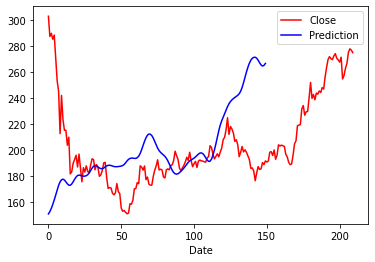

In [ ]:
plt.figure()
plt.plot(real_stock_price, color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

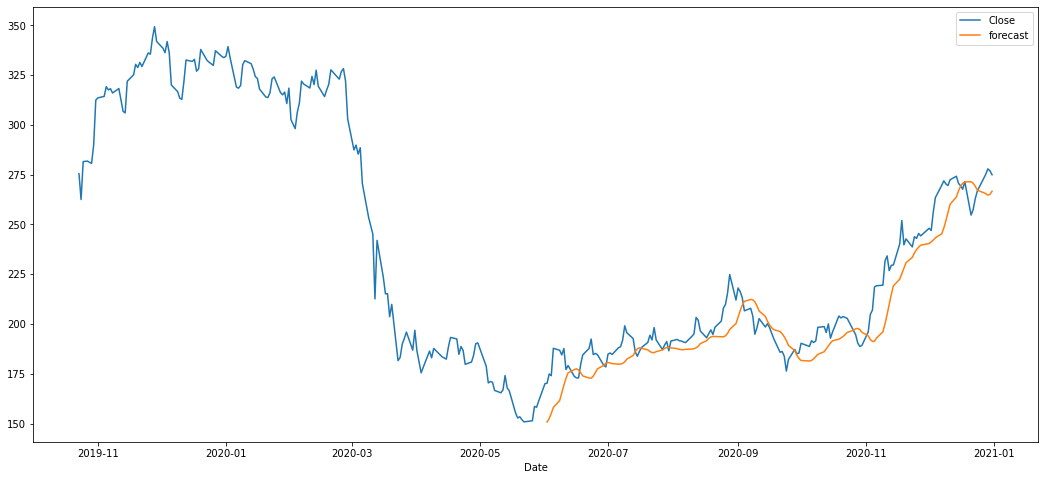

In [ ]:
data2['Close'][len(data2)- 300 :].plot(legend = True, figsize=(18, 8))
output["forecast"].plot(legend = True) 